#Task 1: Линейная диаграмма#
Как обычно, давайте начнем с простой задачи. Если вы еще ни разу не рисовали графики в Python, пришло время заняться этим. Помните, как мы анализировали страницу новостной ленты? Задумывались ли вы о том, как часто посещали эту страницу пользователи?

## 1. Установите соединение с базой данных (как и в прошлом проекте).

In [1]:
import pandas as pd

In [2]:
import sqlite3

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
con = sqlite3.connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

## 2. Выполните запрос, который достает datetime из таблицы pageviews; выбирайте только пользователей, а не администраторов.

In [5]:
page = pd.read_sql('''select datetime from pageviews where uid like 'user_%' ''', con)

In [6]:
page['date'] = page['datetime'].astype('datetime64[ns]')

In [7]:
page.drop(columns = ['datetime'], inplace = True)

In [8]:
page

,date
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


## 3. Используя библиотеку Pandas, создайте новый датафрейм, в котором посещения страницы будут подсчитаны и сгруппированы по дате.

In [9]:
page_cnt = page.groupby(page['date'].dt.date).count()

In [10]:
page_cnt.head()

,date
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


In [11]:
page_cnt.shape

(33, 1)

## 4. Используя метод .plot() библиотеки Pandas, создайте график.

*   Размер шрифта — 8.
*   figsize — 15,8.
*   Название графика — «Число просмотров в день».
*   Обратите внимание на поворот надписей на оси x на графике ниже.

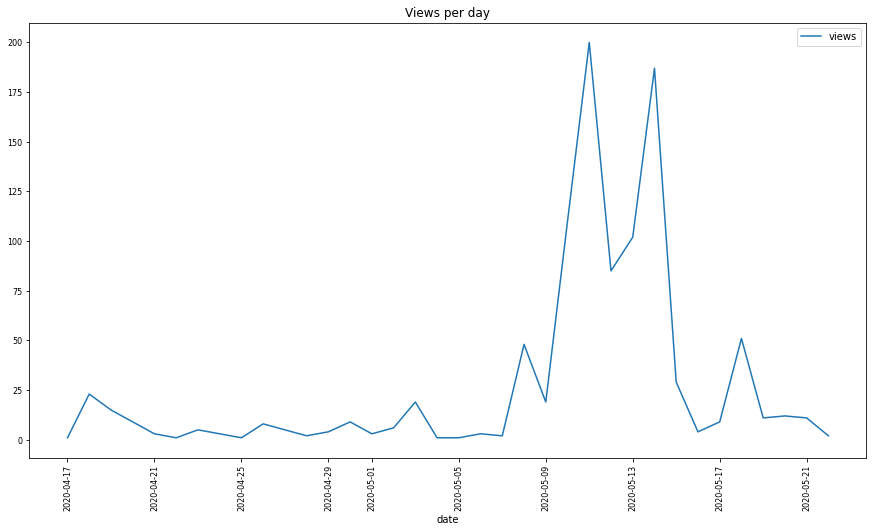

In [12]:
plt = page_cnt.plot(figsize = (15,8), fontsize = 8, title = 'Views per day', rot = 90)
plt.legend(['views'])

## 5. Закройте соединение с базой данных.

In [13]:
con.close()